In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('sinewave.csv')

In [3]:
df.head()

,sinewave
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


In [4]:
ap = pd.read_csv('AirPassengers.csv')

In [5]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
series = ap['#Passengers']

In [7]:
time = ap.index

In [8]:
import matplotlib.pyplot as plt

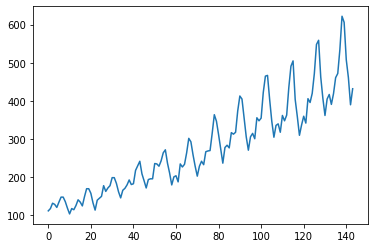

In [9]:
plt.plot(time, series)
plt.show()

In [10]:
time.shape

(144,)

In [11]:
month = ap['Month'].values

In [12]:
month

array(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10', '1949-11', '1949-12',
       '1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06',
       '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12',
       '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06',
       '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12',
       '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06',
       '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12',
       '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06',
       '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12',
       '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06',
       '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12',
       '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
       '1955-07', '1955-08', '1955-09', '1955-10', 

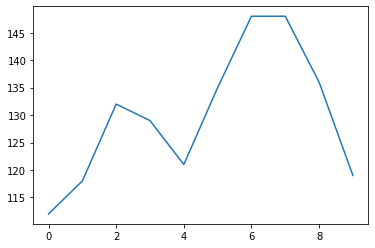

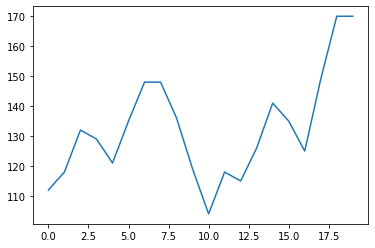

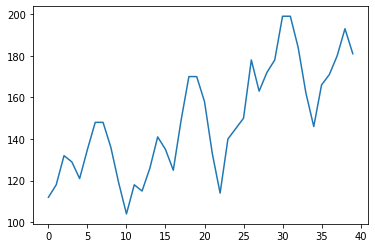

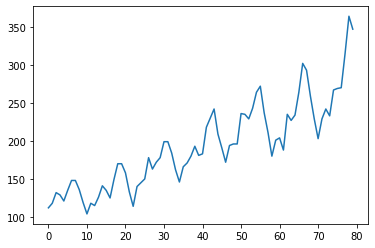

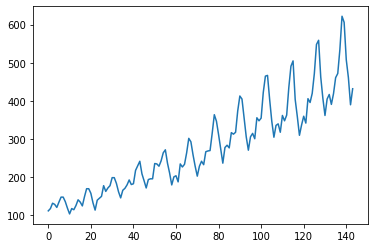

In [13]:
plt.figure()
plt.plot(time[:10], series[:10])
plt.show()

plt.figure()
plt.plot(time[:20], series[:20])
plt.show()

plt.figure()
plt.plot(time[:40], series[:40])
plt.show()


plt.figure()
plt.plot(time[:80], series[:80])
plt.show()

plt.figure()
plt.plot(time, series)
plt.show()


#### Naive Forecast

In [14]:
split_time = 20
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]


naive_forecast = series[split_time - 1 :-1]

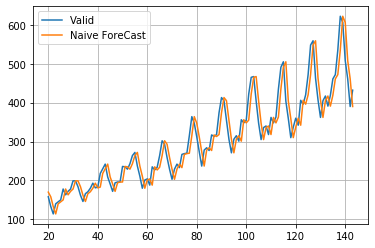

In [15]:
plt.figure()
plt.plot(time_valid, x_valid, label= 'Valid')
plt.plot(time_valid, naive_forecast, label = 'Naive ForeCast')
plt.legend()
plt.grid()
plt.show()

In [16]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

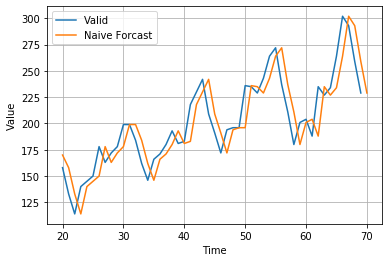

In [17]:
plot_series(time_valid, x_valid, start= 0, end = 50)
plot_series(time_valid, naive_forecast, start = 0, end= 51)
plt.legend(['Valid', "Naive Forcast"])

#### Moving Average

In [18]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast
     if window_size = 30, then the window point size is 30"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

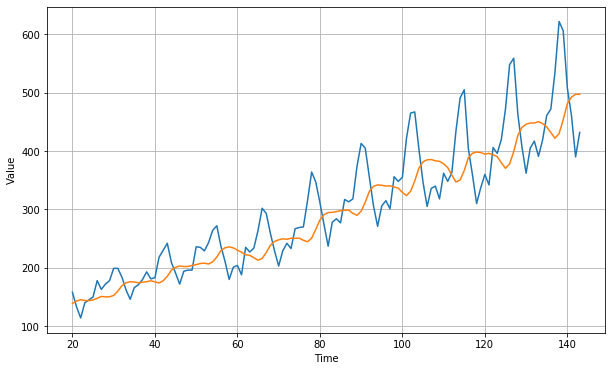

In [19]:
moving_avg = moving_average_forecast(series, 9)[split_time - 9:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)